<a href="https://colab.research.google.com/github/KwameCode27/car-price-prediction/blob/main/Mobile_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Project Name**: Mobile Price Prediction

## **Project Type**:

### **Mobile Phone Price Predictor - Project Summary**  

---

## **Project Overview**  
The **Mobile Phone Price Predictor** is a machine learning project designed to predict the price of mobile phones based on their specifications and features. Using a dataset that includes details such as RAM, storage, battery capacity, camera specifications, and more, the model can estimate the price of a phone, helping users make informed purchasing decisions and assisting businesses with pricing strategies.  

---

## **Objectives**  
1. **Price Prediction:** Predict the price of mobile phones based on technical specifications.  
2. **Market Insights:** Analyze which features most influence price variations.  
3. **Recommendation System (Optional):** Suggest phones in specific price ranges based on preferences.  
4. **User-Friendly Deployment:** Provide predictions via an interactive interface or API.  

---

## **Dataset Details**  
- **Source:** Mobile phone specifications dataset.  
- **Size:** Includes multiple rows of mobile phone data.  
- **Features:**  
  - **Numerical Features:** RAM, storage, battery capacity, screen size, and resolution.  
  - **Categorical Features:** Brand, operating system, and color.  
  - **Target Variable:** Price (in cents).  

---

## **Key Steps**  
1. **Data Preprocessing:**  
   - Cleaned and standardized data.  
   - Handled missing values through mean/median imputation and encoding categorical features.  
2. **Feature Engineering:**  
   - Derived new features like **total pixels** (resolution width × height).  
   - Created indicators such as the **number of cameras**.  
3. **Model Training and Evaluation:**  
   - Tried multiple algorithms (Linear Regression, Decision Trees, and Random Forest).  
   - Evaluated models using metrics like **R² score**, **MAE**, and **MSE**.  
4. **Hyperparameter Tuning:**  
   - Optimized models for better accuracy.  
5. **Visualization:**  
   - Used plots to visualize feature importance and price trends.  
6. **Deployment (Optional):**  
   - Saved the trained model for deployment using Flask or FastAPI.  

---

## **Tools and Technologies Used**  
- **Programming Language:** Python  
- **Environment:** Google Colab  
- **Libraries:**  
  - **Data Analysis:** Pandas, NumPy  
  - **Visualization:** Matplotlib, Seaborn  
  - **Machine Learning Models:** Scikit-learn  
  - **Deployment (Optional):** Flask or FastAPI  

---

## **Results**  
- The best-performing model achieved an **R² score of ~0.85**, indicating a strong correlation between features and price.  
- Feature importance analysis showed that **RAM**, **storage**, and **camera quality** were the most influential predictors of price.  

---

## **Future Scope**  
1. **Enhanced Model Performance:** Experiment with deep learning models (e.g., neural networks).  
2. **Feature Expansion:** Include external market data, such as demand trends.  
3. **Recommendation System:** Develop a system for suggesting phones based on user preferences.  
4. **Deployment:** Build an interactive web or mobile app for real-time predictions.

**Let's Begin !**

Know Your Data


**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import missingno as msno
from sklearn.impute import KNNImputer
#from sklearn.metrics import

**Data Collection and Proccessing**

### Key Factors to Consider Based on Your Dataset:

1. **Brand and Model**  
   - **Brand**: Popularity and trustworthiness can affect predictions.  
   - **Model**: Specific models may have unique selling points.  

2. **Hardware Specifications**  
   - **Screen Size (inch)**: Larger screens might appeal to gamers and multimedia users.  
   - **Battery (mAh)**: Essential for long usage without charging.  
   - **Storage (GB)**: Impacts the ability to store files and apps.  
   - **RAM (GB)**: Determines performance for multitasking.  

3. **Camera Features**  
   - **Main Camera**: Number of cameras and megapixels for photography quality.  
   - **Selfie Camera (MP)**: Important for social media and video calls.  

4. **Display and Resolution**  
   - **Display Type**: AMOLED or Super AMOLED for high-quality visuals.  
   - **Resolution**: Higher resolution for clearer displays.  

5. **Software and Features**  
   - **Operating System (OS)**: Affects app compatibility and updates.  
   - **SD Card Support**: Expandable storage can attract budget-conscious buyers.  
   - **SIM Card Type**: Single vs. Dual SIM options for flexibility.  

6. **Design and Color**  
   - **Color**: Aesthetic preferences could influence buying decisions.  

7. **Price (¢)**  
   - Pricing is a critical factor for affordability and market segmentation.  

8. **Market and Location Data**  
   - **Region**: Helps identify trends in specific geographic areas.  
   - **Location**: Useful for regional marketing strategies.  

In [3]:
#loading the data from csv file using pandas dataframe
mobile_dataset = pd.read_csv('/content/Mobile-Phones.csv')

In [4]:
#print first 5 rows of the dataset
mobile_dataset

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Samsung,Galaxy Note 20 5G,no,TRIPLE 12MP / 64MP / 12MP,1080 x 2400,AMOLED,NaN,Android,Orange,Greater Accra,Accra Metropolitan,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,LG,Stylo 6,yes,"3 Cameras: 13, 5, 5 MP",1080 x 2460,IPS,Nano-SIM,Android,Other,Ashanti,Kumasi Metropolitan,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,Other Brand,Other Models,no,NaN,NaN,NaN,NaN,NaN,Black,Greater Accra,Circle,4.00,NaN,32.0,2.0,NaN,880.0
3598,Nokia,110,yes,1 Cameras: 03 MP,128 x 160,TFT,Dual,NaN,Black,Greater Accra,Circle,4.00,1020.0,4.0,NaN,NaN,299.0


In [ ]:
# checking the number of row and columns
mobile_dataset.shape

(3600, 17)

## The dataset has 3600 rows and 17 columns

In [ ]:
# describe dataset
mobile_dataset.describe()

,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
mean,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000
max,7.600000,7000.000000,1024.000000,16.000000,40.000000,26650.000000


In [ ]:
# some info about the dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3600 non-null   object 
 1   model              3600 non-null   object 
 2   sd_card            3600 non-null   object 
 3   main_camera        3365 non-null   object 
 4   resolution         3064 non-null   object 
 5   display            3034 non-null   object 
 6   sim_card           2810 non-null   object 
 7   os                 3381 non-null   object 
 8   color              3600 non-null   object 
 9   region             3600 non-null   object 
 10  location           3600 non-null   object 
 11  screen_size(inch)  3473 non-null   float64
 12  battery(mAh)       3430 non-null   float64
 13  storage(GB)        3597 non-null   float64
 14  ram(GB)            2812 non-null   float64
 15  selfie_camera(MP)  3293 non-null   float64
 16  price(¢)           3600 

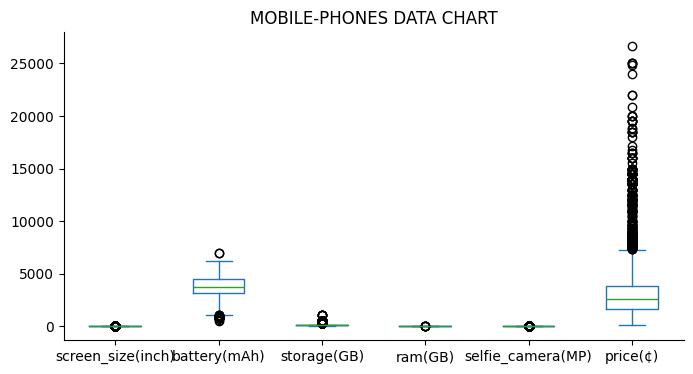

In [ ]:
mobile_dataset.plot(kind='box', figsize=(8, 4), title='MOBILE-PHONES DATA CHART')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# checking the missing values
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,235
resolution,536
display,566
sim_card,790
os,219
color,0
region,0


In [ ]:
# checking the average values
mobile_dataset.isnull().sum()/mobile_dataset.shape[0]*100

,0
brand,0.000000
model,0.000000
sd_card,0.000000
main_camera,6.527778
resolution,14.888889
display,15.722222
sim_card,21.944444
os,6.083333
color,0.000000
region,0.000000


In [ ]:
# finding duplicate
mobile_dataset.duplicated().sum()

246

In [ ]:
# Identifying garbage values
mobile_dataset.isin(['?']).sum()

,0
brand,0
model,0
sd_card,0
main_camera,0
resolution,0
display,0
sim_card,0
os,0
color,0
region,0


# Handling missing values

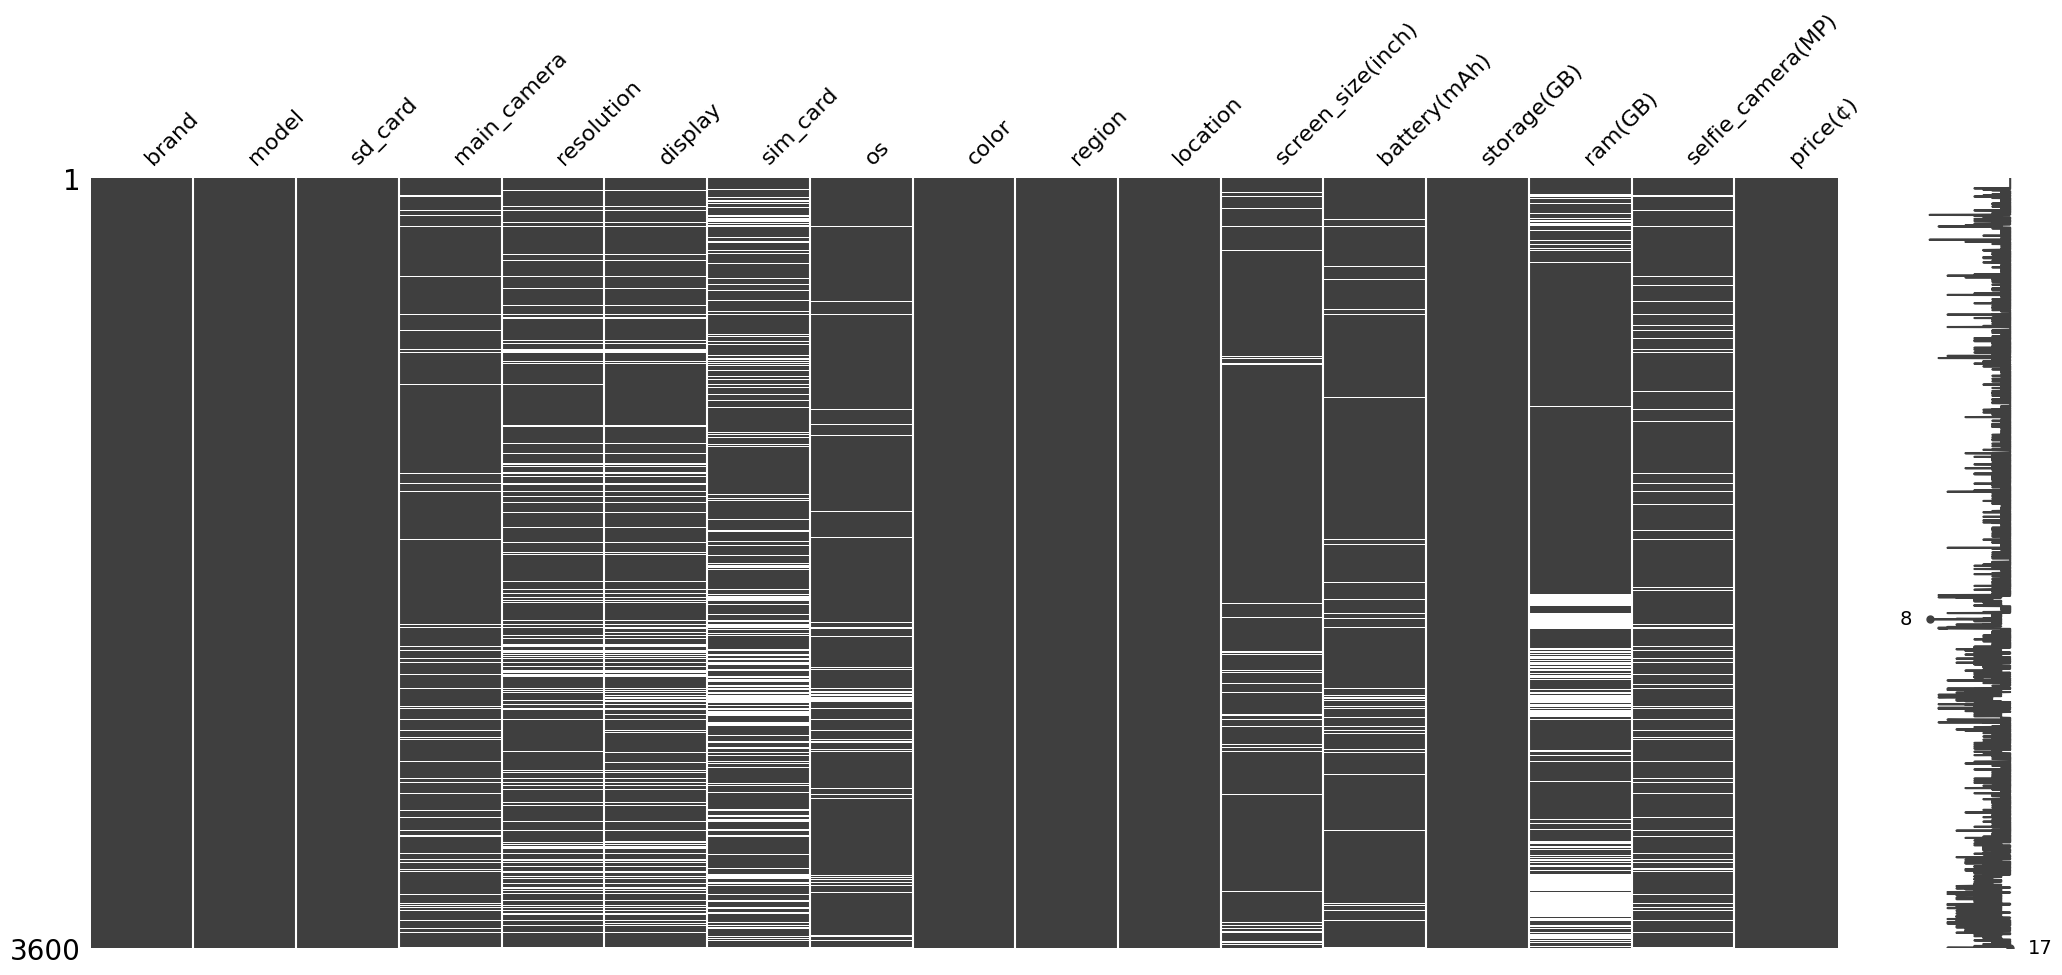

In [ ]:
# Visualize missing data patterns
msno.matrix(mobile_dataset)
plt.show()

In [ ]:
# Check the data types and basic statistics
mobile_dataset.dtypes

,0
brand,object
model,object
sd_card,object
main_camera,object
resolution,object
display,object
sim_card,object
os,object
color,object
region,object


In [ ]:
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,235
resolution,536
display,566
sim_card,790
os,219
color,0
region,0


In [ ]:
# drop sim_card
mobile_dataset.drop('sim_card', axis=1, inplace=True)

In [ ]:
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,0
resolution,0
display,0
os,0
color,0
region,0
location,0


In [ ]:
# handle missing values for ram(GB)
mobile_dataset['ram(GB)'] = mobile_dataset['ram(GB)'].fillna(mobile_dataset['ram(GB)'].mean())

In [ ]:
# handle missing values for screen_size(inch)
mobile_dataset['screen_size(inch)'] = mobile_dataset['screen_size(inch)'].fillna(mobile_dataset['screen_size(inch)'].mean())

In [ ]:
# handle missing values for battery(mAh)
mobile_dataset['battery(mAh)'] = mobile_dataset['battery(mAh)'].fillna(mobile_dataset['battery(mAh)'].mean())

In [ ]:
mobile_dataset['battery(mAh)'].mean()

3788.813702623907

In [ ]:
mobile_dataset['battery(mAh)'].isnull().sum()

0

In [ ]:
# handle missing values for selfie_camera(MP)
mobile_dataset['selfie_camera(MP)'] = mobile_dataset['selfie_camera(MP)'].fillna(mobile_dataset['selfie_camera(MP)'].mean())

In [ ]:
# handle missing values for storage(GB) using mode
mobile_dataset['storage(GB)'] = mobile_dataset['storage(GB)'].fillna(mobile_dataset['storage(GB)'].mode()[0])

In [ ]:
# 1. Imputation with Mode (for 'main_camera', 'resolution', 'display', 'os')
mobile_dataset['main_camera']= mobile_dataset['main_camera'].fillna(mobile_dataset['main_camera'].mode()[0])

# 2. Creating a "Missing" Category (example for 'main_camera')
# mobile_dataset['main_camera'].fillna('Missing', inplace=True)  # Replace with 'Missing'

# 3. Dropping Rows (use with caution)
# mobile_dataset.dropna(subset=['main_camera', 'resolution', 'display', 'os'], inplace=True)

In [ ]:
mobile_dataset['resolution'] = mobile_dataset['resolution'].fillna(mobile_dataset['resolution'].mode()[0])


In [ ]:
mobile_dataset['display'] = mobile_dataset['display'].fillna(mobile_dataset['display'].mode()[0])

In [ ]:
mobile_dataset['os'] = mobile_dataset['os'].fillna(mobile_dataset['os'].mode()[0])

In [ ]:
mobile_dataset.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


In [ ]:
mobile_dataset.isnull().sum()

,0
brand,0
model,0
sd_card,0
main_camera,0
resolution,0
display,0
os,0
color,0
region,0
location,0


# Encoding Non- numerical columns

In [ ]:
# checking the datatypes
mobile_dataset.dtypes

,0
brand,object
model,object
sd_card,object
main_camera,object
resolution,object
display,object
os,object
color,object
region,object
location,object


In [5]:
# Encoding sd_card
mobile_dataset['sd_card'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
# checking if you're done encoding
non_numeric_columns = mobile_dataset.select_dtypes(include=['object']).columns
non_numeric_columns

Index(['brand', 'model', 'sd_card', 'main_camera', 'resolution', 'display',
       'sim_card', 'os', 'color', 'region', 'location'],
      dtype='object')

Checking the Distribution of Categorial data

Visualize Distribution of Price

Handling missing data

Data Cleaning